# Section 2: Linear Algebra Essentials for Machine Learning

In this notebook, you will:
- Understand how vectors and matrices work in ML.
- Perform vector and matrix operations using NumPy.
- Learn about eigenvalues/eigenvectors and why they matter.
- Implement PCA from scratch and compare with sklearn.
---

## 1. Vectors & Operations

**Key Concepts:**
- Vectors represent data points, weights, etc.
- Dot product measures similarity (cosine similarity).
- Norm represents vector length (L2 norm = Euclidean distance).
---

In [1]:
import numpy as np

# Define vectors
v = np.array([1,2,3])
w = np.array([4,5,6])

# Vector operations
print('v + w =', v + w)
print('Dot product =', np.dot(v, w))
print('Norm of v =', np.linalg.norm(v))

v + w = [5 7 9]
Dot product = 32
Norm of v = 3.7416573867739413


### Exercise 1:
- Calculate the cosine similarity between v and w.
- Project vector v onto w.

Cosine Similarity = 0.975
Projection of v onto w: [1.66233766 2.07792208 2.49350649]


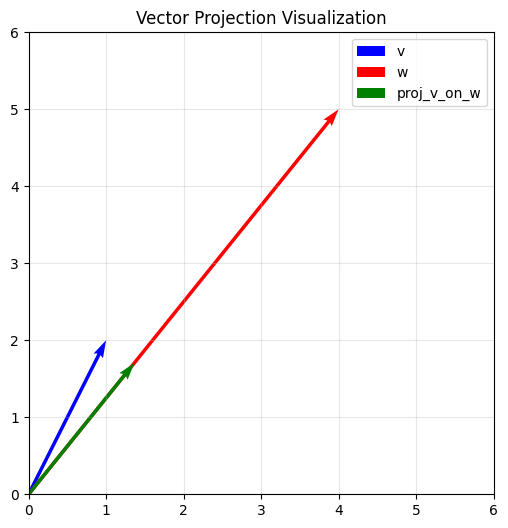

In [2]:
v = np.array([1, 2, 3])
w = np.array([4, 5, 6])

# Cosine Similarity
cosine_sim = np.dot(v, w) / (np.linalg.norm(v) * np.linalg.norm(w))
print(f"Cosine Similarity = {cosine_sim:.3f}")

# Projection of v onto w
def vector_projection(v, w):
    return (np.dot(v, w) / np.dot(w, w)) * w

proj_v_on_w = vector_projection(v, w)
print("Projection of v onto w:", proj_v_on_w)

# Visualization (for 2D vectors)
import matplotlib.pyplot as plt
v2 = np.array([1, 2])
w2 = np.array([4, 5])
proj_v2_on_w2 = vector_projection(v2, w2)

plt.figure(figsize=(6,6))
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v')
plt.quiver(0, 0, w2[0], w2[1], angles='xy', scale_units='xy', scale=1, color='red', label='w')
plt.quiver(0, 0, proj_v2_on_w2[0], proj_v2_on_w2[1], angles='xy', scale_units='xy', scale=1, color='green', label='proj_v_on_w')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('Vector Projection Visualization')
plt.show()

## 2. Matrices & Transformations

**Key Concepts:**
- Matrices can transform vectors (e.g., rotation, scaling).
- Matrix multiplication combines transformations.
- Inverse of a matrix undoes a transformation.
---

In [3]:
# Define a matrix
A = np.array([[2,0],[0,3]])
x = np.array([1,2])

# Apply transformation
Ax = np.dot(A,x)
print('A * x =', Ax)

# Matrix properties
print('Transpose of A:\n', A.T)
print('Inverse of A:\n', np.linalg.inv(A))

A * x = [2 6]
Transpose of A:
 [[2 0]
 [0 3]]
Inverse of A:
 [[0.5        0.        ]
 [0.         0.33333333]]


### Exercise 2:
- Define a random 3x3 matrix and verify A * A_inv = I.
- Use matrix multiplication to rotate a vector by 90° (rotation matrix).

A * A_inv ≈ I:
 [[ 1. -0. -0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]]
Is close to identity? True
Rotated vector: [6.123234e-17 1.000000e+00]


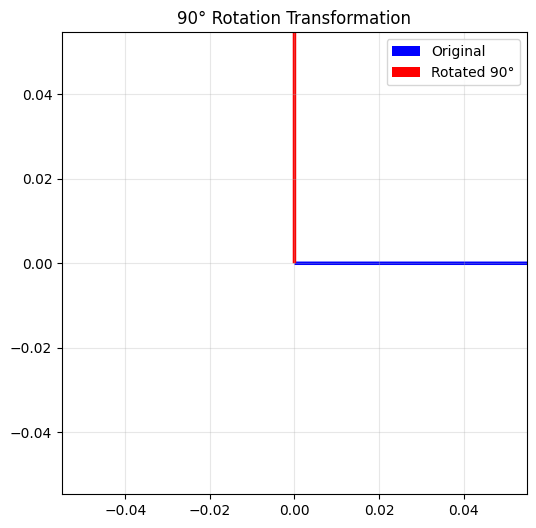

In [4]:
# Random 3x3 matrix
np.random.seed(42)
A = np.random.rand(3,3)
A_inv = np.linalg.inv(A)
I_check = np.dot(A, A_inv)
print("A * A_inv ≈ I:\n", np.round(I_check,3))
print("Is close to identity?", np.allclose(I_check, np.eye(3)))

# Rotation by 90° in 2D
theta = np.pi / 2
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])
x = np.array([1,0])
rotated_x = np.dot(R, x)
print("Rotated vector:", rotated_x)

# Visualization
plt.figure(figsize=(6,6))
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original')
plt.quiver(0, 0, rotated_x[0], rotated_x[1], angles='xy', scale_units='xy', scale=1, color='red', label='Rotated 90°')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('90° Rotation Transformation')
plt.axis('equal')
plt.show()

## 3. Eigenvalues & Eigenvectors

**Key Concepts:**
- Eigenvectors of a matrix are directions that remain unchanged under the transformation.
- Eigenvalues scale these vectors.
- In PCA, eigenvectors of the covariance matrix define principal components.
---

In [5]:
# Eigen decomposition
B = np.array([[3,1],[1,3]])
eigvals, eigvecs = np.linalg.eig(B)
print('Eigenvalues:', eigvals)
print('Eigenvectors:\n', eigvecs)

Eigenvalues: [4. 2.]
Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


### Exercise 3:
- Verify that B * v = λ * v for each eigenpair.
- Try with a random symmetric matrix.

In [6]:
B = np.array([[3,1],[1,3]])
eigvals, eigvecs = np.linalg.eig(B)

for i in range(len(eigvals)):
    left = np.dot(B, eigvecs[:,i])
    right = eigvals[i] * eigvecs[:,i]
    print(f"Eigenvector {i}: LHS ≈ RHS? {np.allclose(left, right)}")

# Try with a random symmetric matrix
np.random.seed(123)
C = np.random.randn(3, 3)
C_sym = (C + C.T) / 2
eigvals_sym, eigvecs_sym = np.linalg.eigh(C_sym)
for i in range(len(eigvals_sym)):
    left = np.dot(C_sym, eigvecs_sym[:,i])
    right = eigvals_sym[i] * eigvecs_sym[:,i]
    print(f"Symmetric Eigenvector {i}: LHS ≈ RHS? {np.allclose(left, right)}")

Eigenvector 0: LHS ≈ RHS? True
Eigenvector 1: LHS ≈ RHS? True
Symmetric Eigenvector 0: LHS ≈ RHS? True
Symmetric Eigenvector 1: LHS ≈ RHS? True
Symmetric Eigenvector 2: LHS ≈ RHS? True


## 4. PCA from Scratch

**Process:**
1. Standardize data.
2. Compute covariance matrix.
3. Perform eigen decomposition.
4. Sort eigenvectors by eigenvalues.
5. Project data onto top components.
---

In [7]:
# Generate synthetic 2D data
np.random.seed(42)
X = np.random.multivariate_normal([0,0], [[3,2],[2,2]], 200)
X_mean = X - np.mean(X, axis=0)

# Covariance matrix
cov_matrix = np.cov(X_mean, rowvar=False)
eigvals, eigvecs = np.linalg.eigh(cov_matrix)

# Sort eigenvectors by eigenvalues (descending)
idx = np.argsort(eigvals)[::-1]
eigvecs = eigvecs[:, idx]

# Project data onto first principal component
pc1 = eigvecs[:,0]
X_proj = X_mean.dot(pc1)

print('Principal component 1:', pc1)

Principal component 1: [-0.78215821 -0.62307987]


### Exercise 4:
- Plot the original data and the first principal component.
- Compare with PCA from sklearn.

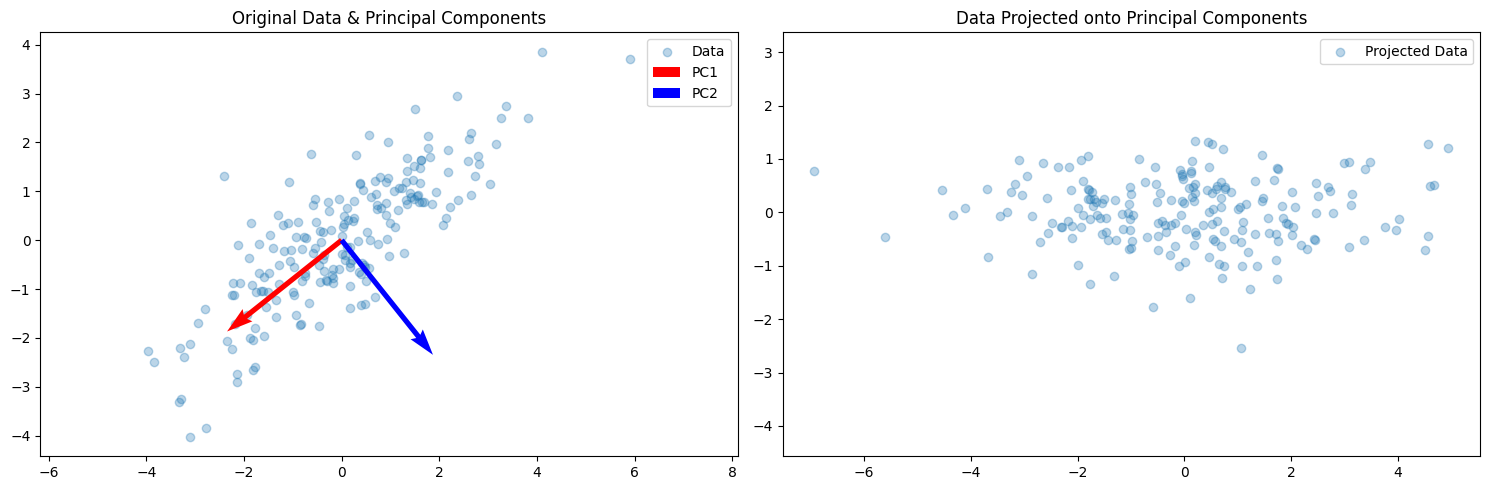

Sklearn PCA components:
 [[ 0.78215821  0.62307987]
 [-0.62307987  0.78215821]]
Explained variance ratio (manual): [0.9111946 0.0888054]
Explained variance ratio (sklearn): [0.9111946 0.0888054]


In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Manual PCA
X_proj_2d = X_mean.dot(eigvecs)

plt.figure(figsize=(15,5))

# Plot original data
plt.subplot(1,2,1)
plt.scatter(X_mean[:,0], X_mean[:,1], alpha=0.3, label="Data")
origin = np.mean(X_mean, axis=0)
plt.quiver(*origin, *(eigvecs[:,0]*3), color='red', scale=1, scale_units='xy', label="PC1")
plt.quiver(*origin, *(eigvecs[:,1]*3), color='blue', scale=1, scale_units='xy', label="PC2")
plt.legend()
plt.axis('equal')
plt.title("Original Data & Principal Components")

# Projected data
plt.subplot(1,2,2)
plt.scatter(X_proj_2d[:,0], X_proj_2d[:,1], alpha=0.3, label="Projected Data")
plt.title("Data Projected onto Principal Components")
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

# Compare with sklearn
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_mean)
print("Sklearn PCA components:\n", pca.components_)
print("Explained variance ratio (manual):", eigvals[idx]/np.sum(eigvals))
print("Explained variance ratio (sklearn):", pca.explained_variance_ratio_)

---
## ✅ Summary
- You learned how to manipulate vectors and matrices using NumPy.
- You explored eigenvalues and eigenvectors and their role in PCA.
- You implemented PCA manually, linking theory with practice.

**Next Notebook:** Calculus for Machine Learning (Gradients & Optimization).